# Neha Priya Singh

# Introduction
Clustering is an unsupervised learning problem,its aim is to identify or discover interesting patterns from the data.

This aim of this task to use K-prototype algorithm on mixed data (numerical + categorical data) and analyze the properties of resulting clusters to gain insights

# 1.Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize,MinMaxScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

# Loading the dataset

In [3]:
df = pd.read_csv('C:/Users/nehap/Downloads/Mall_Customers.csv')
df.shape # dimensions

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Check the missing values
In my dataset there no missing vaules so,it is additional step for this dataset.

In [120]:
missing_cols=df.isnull().sum()/df.shape[0]
missing_cols=missing_cols[missing_cols>0]
missing_cols

Series([], dtype: float64)

# 2. Data Exploration

#CustomerID - Unique ID assigned to the customer

#Gender - Gender of the customer

#Age - Age of the customer

#Annual Income (k$) - Annual Income of the customee

#Spending Score (1-100) - Score assigned by the mall based on customer behavior and spending nature


In [121]:
# over view of dataset
df.set_index('CustomerID',inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


CustomerID will not be input to the clustering algorithm as it doesn't have information so converting it to dataframe index

In [122]:
num_cols=df.select_dtypes(include=['int64']).columns
ctg_cols=df.select_dtypes(include=['object']).columns
print('Numerical Cols=',num_cols)
print('Categorical Cols=',ctg_cols)

Numerical Cols= Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
Categorical Cols= Index(['Gender'], dtype='object')


### Converting Age to bins

In [123]:
print('Min Age =',df.Age.min())
print('Max Age =',df.Age.max())

Min Age = 18
Max Age = 70


In [124]:
df['Age_bins']=pd.cut(df.Age,bins=(17,35,50,70),labels=["18-35","36-50","50+"])
df[['Age','Age_bins']].drop_duplicates(subset=['Age_bins']).reset_index(drop=True)

,Age,Age_bins
0,19,18-35
1,64,50+
2,37,36-50


In [125]:
#For initial run , considering Only Annual Income & SpendingScore (numerical data)
df1=df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.shape

(200, 2)

In [126]:
#Standardize data to bring them in same scale since Annual income & Spending Score are on different scale
std=MinMaxScaler()
arr1=std.fit_transform(df1)
arr1

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

#To standardize the numerical data use MinMaxScaler instead of StandardScaler

MinMaxScaler will bring the numerical features within range of [0,1], so because of this , distance calculated based on the euclidean distance for numerical features will be comparable to that of hamming distance for categorical data.

If StandardScaler is used to standardize the numerical data , numerical features will no longer in the range of [0,1] and will drive the analysis and clusters will be biased towards numerical features and in this example resultant cluster will be exactly same as K-means clusters. I would encourage to run the same analysis with StandardScaler to understand this idea better.

In [75]:
df1['Clusters']=result_cluster
df1['Clusters'].value_counts()

4    53
2    45
3    37
0    36
1    29
Name: Clusters, dtype: int64

In [76]:
d1=df[['Gender','Age_bins']].reset_index(drop=True)
df1_comb=pd.concat([df1.reset_index(drop=True),d1],axis=1)
df1_comb.head()

,Annual Income (k$),Spending Score (1-100),Clusters,Gender,Age_bins
0,15,39,2,Male,18-35
1,15,81,2,Male,18-35
2,16,6,0,Female,18-35
3,16,77,4,Female,18-35
4,17,40,0,Female,18-35


In [114]:
SSE = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 7)
    kmeans.fit(arr1)
    SSE.append(kmeans.inertia_)

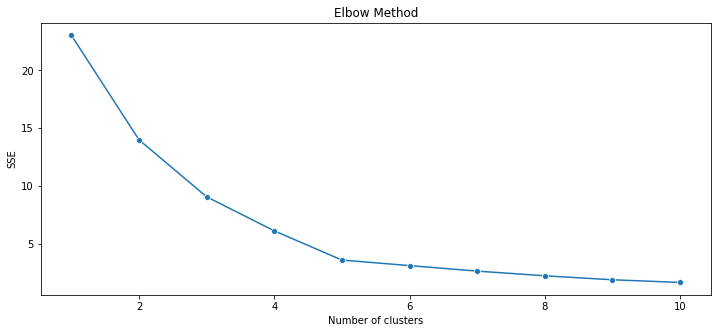

In [115]:
plt.figure(figsize=(12,5))
sns.lineplot(range(1, 11), SSE,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# K-Prototype
k-modes is used for clustering categorical variables. It defines clusters based on the number of matching categories between data points. (This is in contrast to the more well-known k-means algorithm, which clusters numerical data based on Euclidean distance.) The k-prototypes algorithm combines k-modes and k-means and is able to cluster mixed numerical / categorical data.

In [91]:
df_proto=pd.DataFrame(arr1,columns=['Annual Income','Spending Score'])
df_proto.head()

,Annual Income,Spending Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [92]:
d2=pd.concat([df_proto,d1],axis=1)
d2.head()

,Annual Income,Spending Score,Gender,Age_bins
0,0.000000,0.387755,Male,18-35
1,0.000000,0.816327,Male,18-35
2,0.008197,0.051020,Female,18-35
3,0.008197,0.775510,Female,18-35
4,0.016393,0.397959,Female,18-35


#### K-Prototype Algorithm (Number of Clusters = 5)    

In [93]:
kproto_clusters=KPrototypes(n_clusters=5,random_state=7,init="Cao")
result_cluster=kproto_clusters.fit_predict(d2,categorical=[2,3])

In [94]:
d2['Clusters']=result_cluster
d2['Clusters'].value_counts()

4    53
2    45
3    37
0    36
1    29
Name: Clusters, dtype: int64

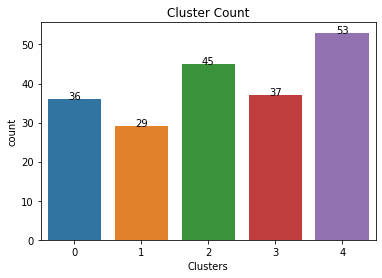

In [95]:
ax=sns.countplot(x=df1_comb.Clusters)
for index, row in pd.DataFrame(df1_comb['Clusters'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    #print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

# Clusters Centroid

In [96]:
kproto_clusters.cluster_centroids_

[array([[0.26662113, 0.34807256],
        [0.48473714, 0.2244898 ],
        [0.3712204 , 0.69931973],
        [0.40097475, 0.34362934],
        [0.36776987, 0.70157874]]),
 array([['Female', '50+'],
        ['Male', '36-50'],
        ['Male', '18-35'],
        ['Female', '36-50'],
        ['Female', '18-35']], dtype='<U6')]

In [97]:
df1.drop(['Clusters'],axis=1,inplace=True)
d3=pd.concat([df1.reset_index(drop=True),d2],axis=1)
d3.head()

,Annual Income (k$),Spending Score (1-100),Annual Income,Spending Score,Gender,Age_bins,Clusters
0,15,39,0.000000,0.387755,Male,18-35,2
1,15,81,0.000000,0.816327,Male,18-35,2
2,16,6,0.008197,0.051020,Female,18-35,0
3,16,77,0.008197,0.775510,Female,18-35,4
4,17,40,0.016393,0.397959,Female,18-35,0


# Cluster Analysis

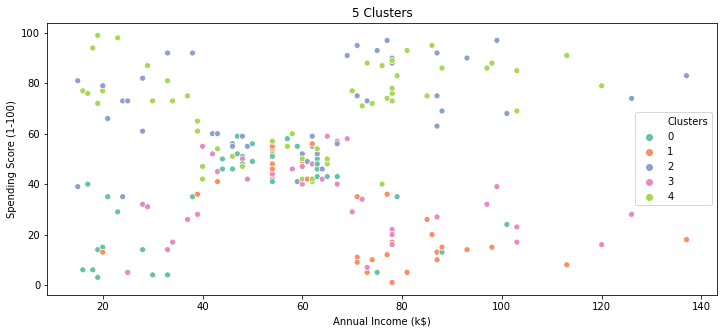

In [98]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=d3['Annual Income (k$)'],y=d3['Spending Score (1-100)'],hue=d3.Clusters,palette="Set2",)
plt.title('5 Clusters')
plt.show()

Based on the above scatter plot , it seems there is no clear pattern ,but important point here to understand is that we have used 4 features to build out these clusters and we have plotted just 2 features here so appearance could be deceptive ,keep an open mind.

In [99]:
# Data visualizatio with (Heatmap plot)

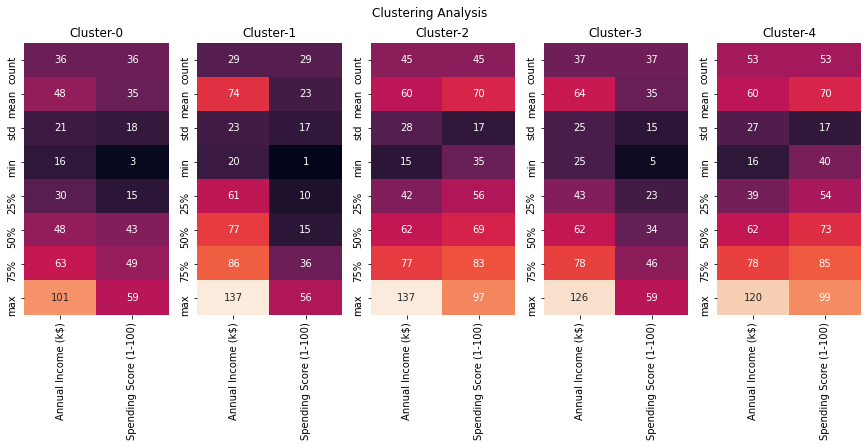

In [100]:
fig,ax=plt.subplots(1,5,figsize=(15,5))
#cbar_ax = fig.add_axes([1.03, .3, .03, .4])
for cluster_val in sorted(d3.Clusters.unique()):
    #print(cluster_val)
    sns.heatmap(d3.loc[d3.Clusters==cluster_val,['Annual Income (k$)', 'Spending Score (1-100)']].describe().round(),annot=True,fmt='g',ax=ax[cluster_val],\
               cbar=i == 0,vmin=0, vmax=130)
    titl='Cluster-'+str(cluster_val)
    ax[cluster_val].set_title(titl)
plt.suptitle('Clustering Analysis')
#plt.tight_layout()
plt.show()

# Age Wise Analysis

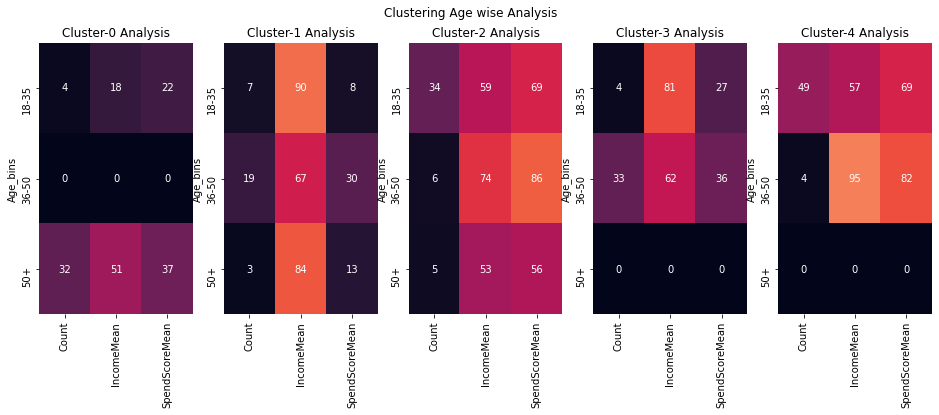

In [101]:
fig,ax=plt.subplots(1,5,figsize=(16,5))
#cbar_ax = fig.add_axes([1.03, .3, .03, .4])
for cluster_val in sorted(d3.Clusters.unique()):
    #print(cluster_val)
    sns.heatmap(d3.loc[d3.Clusters==cluster_val,:].groupby('Age_bins').agg({'Clusters':'size','Annual Income (k$)':'mean','Spending Score (1-100)':'mean'}).\
    rename(columns={'Clusters':'Count','Annual Income (k$)':'IncomeMean','Spending Score (1-100)':'SpendScoreMean'})\
                .fillna(0).round(),annot=True,fmt='g',ax=ax[cluster_val],cbar=i == 0,vmin=0, vmax=130)
    titl='Cluster-'+str(cluster_val)+' Analysis'
    ax[cluster_val].set_title(titl)
plt.suptitle('Clustering Age wise Analysis')
#plt.tight_layout()
plt.show()

# Gender Wise Analysis

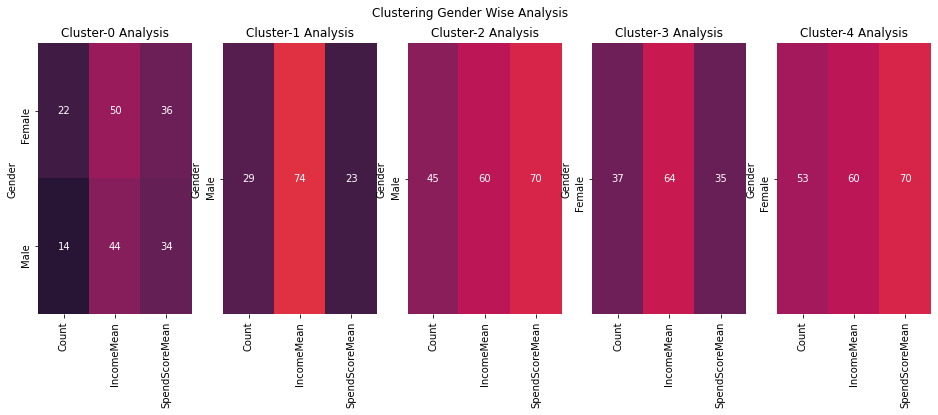

In [102]:
fig,ax=plt.subplots(1,5,figsize=(16,5))
#cbar_ax = fig.add_axes([1.03, .3, .03, .4])
for cluster_val in sorted(d3.Clusters.unique()):
    #print(cluster_val)
    sns.heatmap(d3.loc[d3.Clusters==cluster_val,:].groupby('Gender').agg({'Clusters':'size','Annual Income (k$)':'mean','Spending Score (1-100)':'mean'}).\
    rename(columns={'Clusters':'Count','Annual Income (k$)':'IncomeMean','Spending Score (1-100)':'SpendScoreMean'})\
                .fillna(0).round(),annot=True,fmt='g',ax=ax[cluster_val],cbar=i == 0,vmin=0, vmax=130)
    titl='Cluster-'+str(cluster_val)+' Analysis'
    ax[cluster_val].set_title(titl)
plt.suptitle('Clustering Gender Wise Analysis')
#plt.tight_layout()
plt.show()

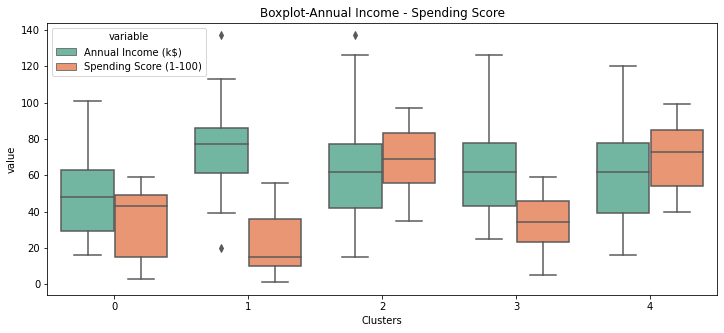

In [103]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Clusters',y='value',hue='variable',\
            data=pd.melt(d3,id_vars=['Clusters'],value_vars=['Annual Income (k$)','Spending Score (1-100)']),\
           palette="Set2")
plt.xlabel("Clusters")
plt.title("Boxplot-Annual Income - Spending Score")
plt.show()

# Observations

In [64]:
#######################################################################################################################